# Data Cleaning
### Table of Contents
- [Requirements](#requirements)
- [Visualizing Missingness](#visualizing-missingness)
  - [By Variable](#by-variable)
  - [By Year Per State](#by-year-per-state)
- [Dataset Cleaning](#dataset-cleaning)
- [Effects on the Data](#effects-on-the-Data)

## Requirements

In [16]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from scipy.stats import ks_2samp

## Visualizing Missingness

In [17]:
# reading the raw, integrated dataset

df = pd.read_csv('../../data/raw/integrated.csv') # file path appears as `data/raw/integrated.csv` in `cleaning.py`

### By Variable

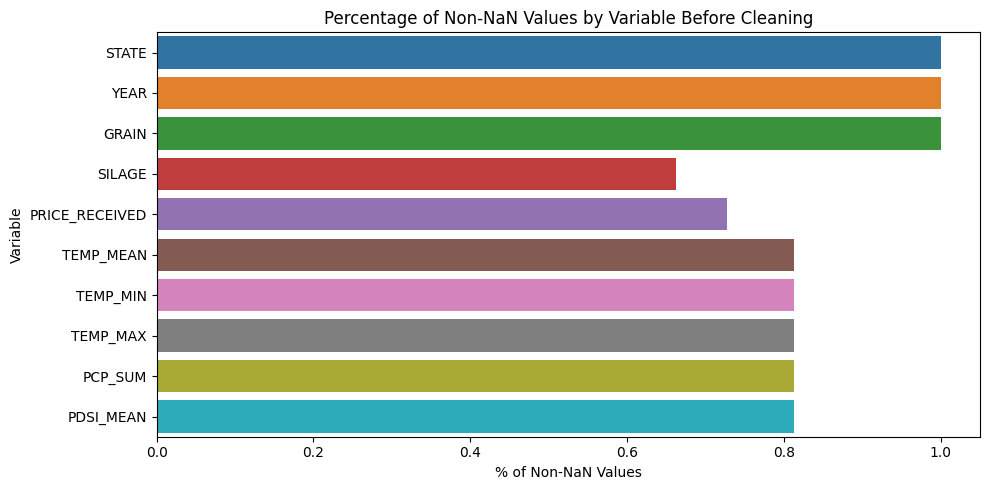

In [18]:
pct_nonnull = df.notna().sum().to_numpy() / len(df)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    ax=ax,
    x=pct_nonnull, y=df.columns,
    hue=mcolors.TABLEAU_COLORS.keys(), legend=False
)
ax.set_xlabel('% of Non-NaN Values')
ax.set_ylabel('Variable')
ax.set_title('Percentage of Non-NaN Values by Variable Before Cleaning')
plt.tight_layout()
plt.savefig(
    f'../../results/cleaning/raw_msno_bar.png' # file path appears as `results/cleaning/raw_msno_bar.png` in `cleaning.py`
)
plt.show()

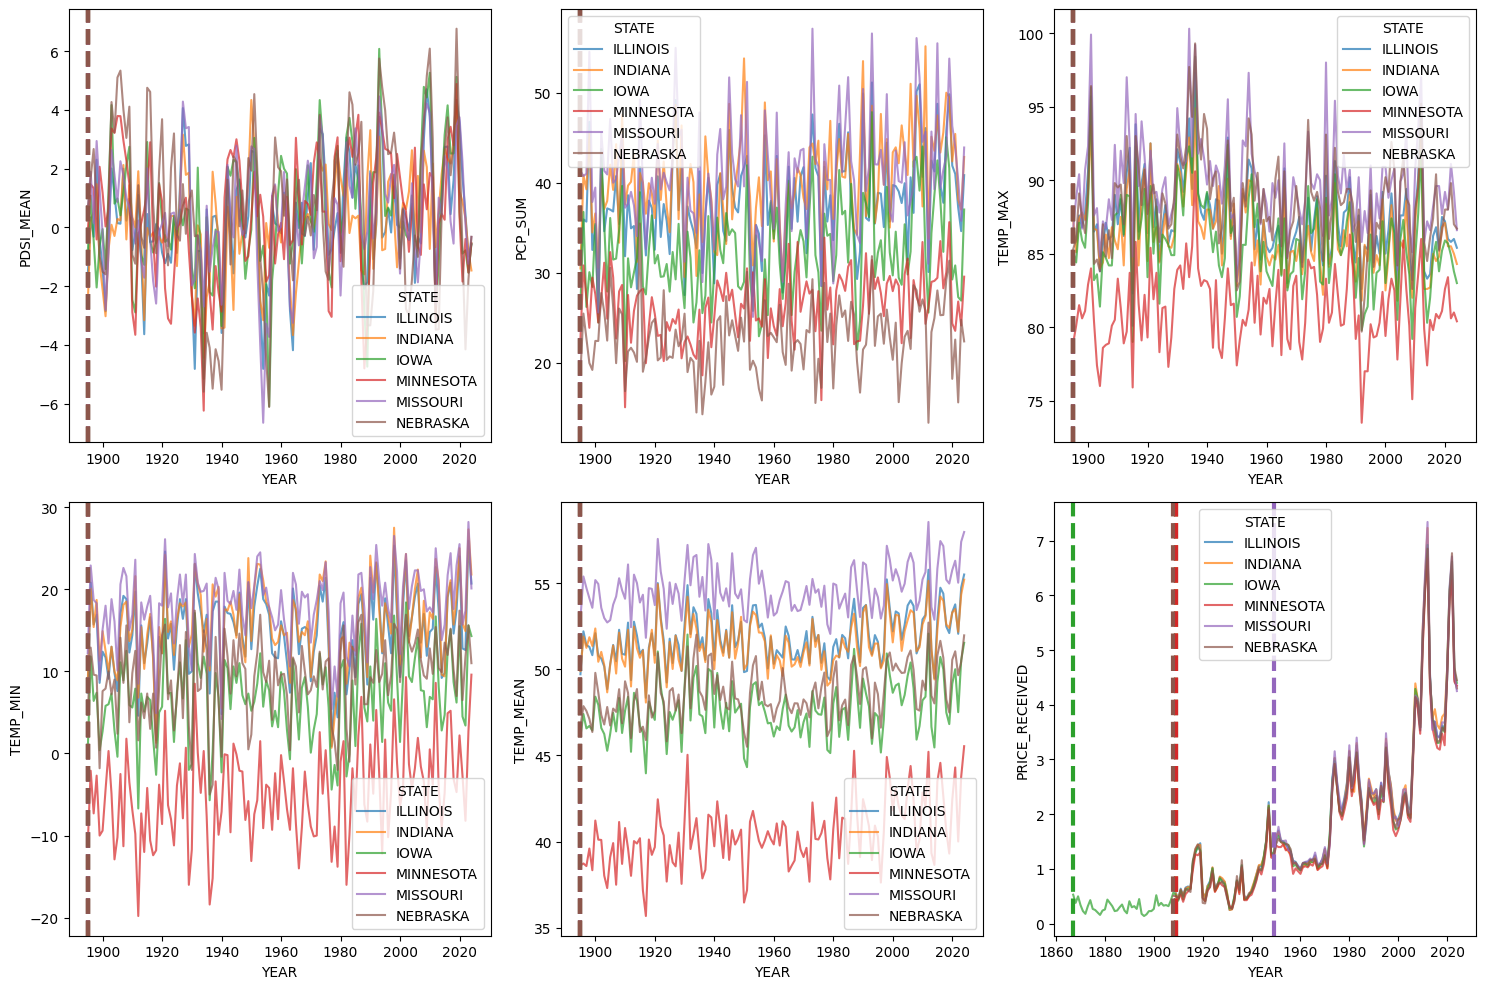

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
palette = sns.color_palette('tab10', n_colors=len(df['STATE'].unique()))

for i, col in enumerate(df.columns[-1:-7:-1]):
    ax = axes[i//3, i%3]
    sns.lineplot(
        ax=ax,
        x=df['YEAR'], y=df[col],
        hue=df['STATE'], palette=palette, alpha=0.7
    )
    for s, state in enumerate(df['STATE'].unique().tolist()):
        state_data = df[df['STATE'] == state][['STATE', 'YEAR', col]].dropna()
        first_year = state_data['YEAR'].min()
        ax.axvline(x=first_year, color=palette[s], linestyle='--', linewidth=3)

plt.tight_layout()
plt.savefig('../../results/cleaning/raw_lineplots.png') # file path appears as `results/cleaning/raw_lineplots.png` in `cleaning.py`
plt.show()

## Dataset Cleaning

In [20]:
## refining dataset timeframe
df_clean = df[
    (df['YEAR'] >= 1895)
    & (df['YEAR'] <= 2024)
].drop(columns=['SILAGE', 'PRICE_RECEIVED'])

In [21]:
df_clean

,STATE,YEAR,GRAIN,TEMP_MEAN,TEMP_MIN,TEMP_MAX,PCP_SUM,PDSI_MEAN
174,ILLINOIS,1895,41.0,49.708333,7.4,86.5,31.15,-1.687500
175,INDIANA,1895,36.0,49.900000,8.5,87.3,30.50,-2.667500
176,IOWA,1895,39.0,46.108333,0.1,85.1,26.33,-0.895833
177,MINNESOTA,1895,30.5,38.608333,-11.2,78.9,22.67,-0.184167
178,MISSOURI,1895,37.0,52.925000,12.2,86.7,41.35,0.557500
...,...,...,...,...,...,...,...,...
949,INDIANA,2024,198.0,55.200000,21.8,84.3,42.89,-1.468333
950,IOWA,2024,211.0,51.533333,14.3,83.0,37.05,-0.558333
951,MINNESOTA,2024,174.0,45.533333,9.6,80.4,29.59,-0.540833
952,MISSOURI,2024,183.0,57.966667,20.1,86.6,43.94,-0.325833


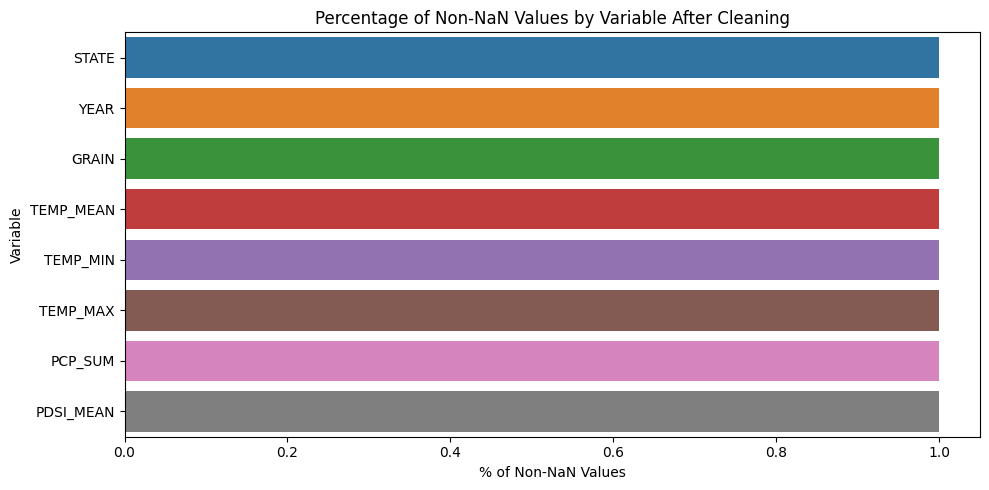

In [22]:
pct_nonnull = df_clean.notna().sum().to_numpy() / len(df_clean)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    ax=ax,
    x=pct_nonnull, y=df_clean.columns,
    hue=list(mcolors.TABLEAU_COLORS.keys())[:len(df_clean.columns)], legend=False
)
ax.set_xlabel('% of Non-NaN Values')
ax.set_ylabel('Variable')
ax.set_title('Percentage of Non-NaN Values by Variable After Cleaning')
plt.tight_layout()
plt.savefig(
    f'../../results/cleaning/clean_msno_bar.png' # file path appears as `results/cleaning/clean_msno_bar.png` in `cleaning.py`
)
plt.show()